In [1]:
from utils import *
import utils
utils.init_dev(utils.get_dev())
utils.allow_growth()

%load_ext autoreload
# %reload_ext autoreload
%autoreload 2
%matplotlib inline
import matplotlib
matplotlib.style.use('ggplot')

from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

from cifar100_train import *

Auto select gpu
 ID  GPU  MEM
--------------
  0  51%  66%
  1   0%   1%
  2   0%   1%
  3   0%   1%
  4   0%   1%
  5   0%   1%
  6   0%   0%
  7   0%   1%
available [6]


Using TensorFlow backend.


Auto select gpu
 ID  GPU  MEM
--------------
  0  56%  66%
  1   0%   1%
  2   0%   1%
  3   0%   1%
  4   0%   1%
  5   0%   1%
  6   0%   1%
  7   0%   1%
available [2]


In [2]:
dataset = cifar100.get_split('train', FLAGS.data_dir)
# load batch of dataset
batch_queue = load_batch(
    dataset,
    2,
    is_training=True)
images, labels = batch_queue.dequeue()
predictions,end_points = resnet101(images, classes=100)
tf.get_variable_scope().reuse_variables()
beta = 1.
gamma = 1.

# get the cross-entropy loss
one_hot_labels = slim.one_hot_encoding(
    labels,
    dataset.num_classes)

loss_100 = tf.losses.softmax_cross_entropy(
    logits=predictions,
    onehot_labels=one_hot_labels)

# labels_coarse = map_label(labels)
labels_coarse = tf.to_int64(labels // 5)
one_hot_labels_coarse = slim.one_hot_encoding(labels_coarse, 20)

predictions_reshape = tf.reshape(tf.nn.softmax(predictions), (-1, 20, 5))
loss_20 = tf.losses.log_loss(
    predictions=tf.reduce_sum(predictions_reshape, axis=-1), labels=one_hot_labels_coarse, weights=beta
    , loss_collection=None
)

loss_group_l = []
for ind in range(20):
    predictions_ = tf.reshape(predictions, (-1, 20, 5))
    bs = tf.shape(predictions_, out_type=tf.int64)[0]
    sel = tf.stack([tf.range(bs, dtype=tf.int64), labels // 5], axis=1)
    predictions_ = tf.gather_nd(predictions_, sel)

    one_hot_labels_group = slim.one_hot_encoding(tf.mod(labels, 5), 5)
    loss_group_l.append(
            tf.losses.softmax_cross_entropy(
                logits=predictions_,
                onehot_labels=one_hot_labels_group,
                loss_collection=None,
                weights=gamma))

loss_group = tf.add_n(loss_group_l)
# tf.losses.add_loss(loss_group)

In [3]:
with tf.InteractiveSession().as_default():
    _=tf.train.start_queue_runners(sess=tf.get_default_session())
    tf.global_variables_initializer().run()
    sess=tf.get_default_session()
    print sess.run([labels,labels_coarse,
                    sel,predictions_,one_hot_labels_group,loss_group,
                    tf.losses.softmax_cross_entropy(
                logits=predictions_,
                onehot_labels=one_hot_labels_group,
                loss_collection=None,
                weights=gamma)]+loss_group_l)

Auto select gpu
 ID  GPU  MEM
--------------
  0   0%   1%
  1   0%   0%
  2   0%   0%
  3   0%   0%
  4   0%   0%
  5   0%   0%
  6   0%   0%
  7   0%   0%
available [1]
[array([77, 20]), array([15,  4]), array([[ 0, 15],
       [ 1,  4]]), array([[ 0.90386468,  0.36470109,  0.90736318, -0.92876112,  1.51715112],
       [-0.92795539, -0.70712417,  1.13920856,  0.95388913, -0.47225183]], dtype=float32), array([[ 0.,  0.,  1.,  0.,  0.],
       [ 1.,  0.,  0.,  0.,  0.]], dtype=float32), 44.275681, 2.213784, 2.213784, 2.213784, 2.213784, 2.213784, 2.213784, 2.213784, 2.213784, 2.213784, 2.213784, 2.213784, 2.213784, 2.213784, 2.213784, 2.213784, 2.213784, 2.213784, 2.213784, 2.213784, 2.213784, 2.213784]


In [2]:
from datasets.cifar100 import * 
import utils 
from datasets import cifar100
from cifar100_train import * 

In [3]:
batch_size=FLAGS.batch_size

In [4]:
# load the dataset
dataset = cifar100.get_split('train', FLAGS.data_dir)

# load batch of dataset
data_provider = slim.dataset_data_provider.DatasetDataProvider(
        dataset,
        num_readers=8,
        common_queue_capacity=40 * batch_size,
        common_queue_min=20 * batch_size)

images, labels = data_provider.get(['image', 'label'])


In [5]:
sess=tf.Session(config= utils.allow_growth_config()) 
_=tf.train.queue_runner.start_queue_runners(sess)


64
possum


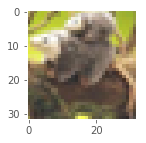

In [24]:
# lb=0
# while lb!=52:
im,lb=sess.run([images,labels])

from datasets.cifar100 import *
# a2b_map = {a:b for b,a in b2a_map.items()}
plt.figure(figsize=(2,2))
plt.imshow(im,)
plt.grid('off')
print lb
# blb=a2b_map[lb]
# print blb 
print fine_labels_human[lb]

In [25]:
c2f_map

{0: {4, 30, 55, 72, 95},
 1: {1, 32, 67, 73, 91},
 2: {54, 62, 70, 82, 92},
 3: {9, 10, 16, 28, 61},
 4: {0, 51, 53, 57, 83},
 5: {22, 39, 40, 86, 87},
 6: {5, 20, 25, 84, 94},
 7: {6, 7, 14, 18, 24},
 8: {3, 42, 43, 88, 97},
 9: {12, 17, 37, 68, 76},
 10: {23, 33, 49, 60, 71},
 11: {15, 19, 21, 31, 38},
 12: {34, 63, 64, 66, 75},
 13: {26, 45, 77, 79, 99},
 14: {2, 11, 35, 46, 98},
 15: {27, 29, 44, 78, 93},
 16: {36, 50, 65, 74, 80},
 17: {47, 52, 56, 59, 96},
 18: {8, 13, 48, 58, 90},
 19: {41, 69, 81, 85, 89}}

In [28]:
mapp={}
for c,fs in c2f_map.items():
    for f in fs:
        if coarse_labels_human[c] not in mapp: 
            mapp[coarse_labels_human[c]]={fine_labels_human[f]}
        else:
            mapp[coarse_labels_human[c]].add(fine_labels_human[f])

In [37]:
from datasets.cifar100 import * 

In [63]:
f2c_map={}
for c,fs in c2f_map.items():
    for f in fs:
        f2c_map[f]=c
f2c_arr=np.array(f2c_map.values())
c2f_arr=np.array([list(v) for v in c2f_map.values()])
def c2f(c):
    return c2f_arr[c,:]

def f2c(f):
    return f2c_arr[f]

In [81]:
c2f_arr
f2c_arr

array([[72, 95,  4, 30, 55],
       [32, 73, 67, 91,  1],
       [82, 70, 92, 54, 62],
       [16,  9, 10, 28, 61],
       [ 0, 57, 83, 53, 51],
       [40, 39, 22, 86, 87],
       [25, 94, 84,  5, 20],
       [24, 18, 14,  6,  7],
       [88, 97, 42,  3, 43],
       [76, 17, 68, 37, 12],
       [49, 71, 60, 33, 23],
       [15, 19, 21, 38, 31],
       [64, 66, 75, 34, 63],
       [45, 26, 99, 77, 79],
       [11,  2, 35, 98, 46],
       [27, 44, 29, 78, 93],
       [80, 65, 50, 36, 74],
       [56, 96, 59, 52, 47],
       [ 8, 48, 58, 90, 13],
       [81, 41, 85, 89, 69]])

array([ 4,  1, 14,  8,  0,  6,  7,  7, 18,  3,  3, 14,  9, 18,  7, 11,  3,
        9,  7, 11,  6, 11,  5, 10,  7,  6, 13, 15,  3, 15,  0, 11,  1, 10,
       12, 14, 16,  9, 11,  5,  5, 19,  8,  8, 15, 13, 14, 17, 18, 10, 16,
        4, 17,  4,  2,  0, 17,  4, 18, 17, 10,  3,  2, 12, 12, 16, 12,  1,
        9, 19,  2, 10,  0,  1, 16, 12,  9, 13, 15, 13, 16, 19,  2,  4,  6,
       19,  5,  5,  8, 19, 18,  1,  2, 15,  6,  0, 17,  8, 14, 13])

In [83]:
tf.logging.set_verbosity(tf.logging.DEBUG)
# load the dataset
dataset = cifar100.get_split('train', FLAGS.data_dir)

# load batch of dataset
batch_queue = load_batch(
    dataset,
    FLAGS.batch_size,
    is_training=True)
images, labels = batch_queue.dequeue()
slim.summary.image('input/image', images)

tf.get_variable_scope().reuse_variables()
# run the image through the model
predictions, end_points = resnet50(images, classes=dataset.num_classes)

# get the cross-entropy loss
one_hot_labels = slim.one_hot_encoding(
    labels,
    dataset.num_classes)

loss_100 = tf.losses.softmax_cross_entropy(
    logits=predictions,
    onehot_labels=one_hot_labels)

labels_coarse = tf.py_func(f2c, [labels], tf.int64)
# labels_coarse= tf.reshape(tf.concat(tf.constant(1,tf.int64), labels_coarse), [ 1,2])
labels_coarse = tf.reshape(labels_coarse, labels.shape)
labels_fine = tf.py_func(c2f, [labels_coarse], tf.int64)
labels_fine = tf.reshape(labels_fine, labels.shape.as_list() + [5, ])

one_hot_labels_coarse = tf.reduce_sum(
    tf.reshape(slim.one_hot_encoding(
        tf.reshape(labels_fine, (-1,)),
        num_classes=dataset.num_classes),
        labels.shape.as_list() + [5, -1]), axis=1
)

loss_20 = tf.losses.softmax_cross_entropy(
    logits=predictions,
    onehot_labels=one_hot_labels_coarse,
    weights=FLAGS.beta,
    loss_collection=None if not FLAGS.multi_loss else tf.GraphKeys.LOSSES
)

bs = labels_fine.shape[0]
predictions_l = []
for ind in range(5):
    sel = tf.stack([tf.range(bs, dtype=tf.int64), labels_fine[:, ind]], axis=1)
    predictions_l.append(tf.gather_nd(predictions, sel))
predictions_group = tf.stack(predictions_l, axis=1)

labels_group_one_hot = tf.equal(labels_fine, tf.expand_dims(labels, axis=-1))
labels_group_one_hot = tf.to_int64(labels_group_one_hot)

loss_group = tf.losses.softmax_cross_entropy(
    logits=predictions_group,
    onehot_labels=labels_group_one_hot,
    weights=FLAGS.gamma,
    loss_collection=None if not FLAGS.multi_loss else tf.GraphKeys.LOSSES
)

<tf.Tensor 'input/image_2:0' shape=() dtype=string>

In [79]:
sess=tf.Session(config=utils.allow_growth_config())
_=tf.train.queue_runner.start_queue_runners(sess)

In [ ]:
sess.run([labels,labels_coarse,labels_fine])

In [ ]:
sess_run([predictions,one_hot])

In [ ]:
variables=tf.model_variables() 
slim.model_analyzer.analyze_vars(variables,print_info=True)